# Visualize Fisher Results

The fisher has been calculated, and this notebook is purely to visualize what it means and how it relates to the full analysis by an MCMC

The Fisher information matrix effectively models the likelihood distribution as a normal distribution (w.r.t the model parameters, not the data, and assuming you start with a normal distribution for the data).

$$ \log \mathcal{L} \sim -\frac{1}{2} \boldsymbol{\theta}.\boldsymbol{F}.\boldsymbol{\theta}$$

$$ \boldsymbol{F}_{i,j} = \langle \partial_{\theta_i} h | \partial_{\theta_j} h\rangle $$

Taken at face value, this can be treated as the posterior on the parameters if the prior is assumed to be uniform in the parameters used to take the derivative. For GWAT, that's $\{\alpha,\delta, \psi, \iota, \phi_{\rm ref}, t_c, \log D_L, \log \mathcal{M}, \eta, \chi_1, \chi_2\}$. **Note**, this is not the standard priors used in most analyses, and for direct comparisons, there should be transformations. We will show some of these transformations below through importance sampling, which is not useful in many situations because we go from an analytic function to discrete samples. That means this is not **usually** done in many works, but this shows the connection between this analysis and more robust ones. We will simply be illustrating how to incorporate fixed boundaries on the priors in this example

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from scipy.stats import multivariate_normal


## Load in Fisher data

In [12]:
fisher = np.loadtxt("../data/fisher_output.csv",delimiter=',')
injection = np.loadtxt("../data/injection.csv",delimiter=',')
cov = np.linalg.inv(fisher)
print(fisher.shape,injection.shape)

(11, 11) (11,)


In [16]:
print(injection)

[ 3.42       -0.37        0.2         2.53220735  2.          1.
  6.39692966  2.62451027  0.24609375  0.          0.        ]


In [13]:
## Define priors

In [19]:
def priorRanges(samples):
    # Hard boundaries for parametes above
    mask = (samples[:,0] > 0) & (samples[:,0] < 2*np.pi)    
    mask *= (samples[:,1] > -np.pi/2) & (samples[:,1] < np.pi/2)
    mask *= (samples[:,2] > 0) & (samples[:,2] < np.pi)
    mask *= (samples[:,3] > 0) & (samples[:,3] < np.pi)
    mask *= (samples[:,4] > 0) & (samples[:,4] < 2*np.pi)
    mask *= (samples[:,5] > 1-.1) & (samples[:,5] < 1+.1)
    mask *= (samples[:,6] > np.log(1)) & (samples[:,6] < np.log(1000))
    mask *= (samples[:,7] > np.log(1)) & (samples[:,7] < np.log(100))
    mask *= (samples[:,8] > .1) & (samples[:,8] < .25)
    mask *= (samples[:,9] > -.1) & (samples[:,9] < .1)
    mask *= (samples[:,10] > -.1) & (samples[:,10] < .1)
    return mask
    

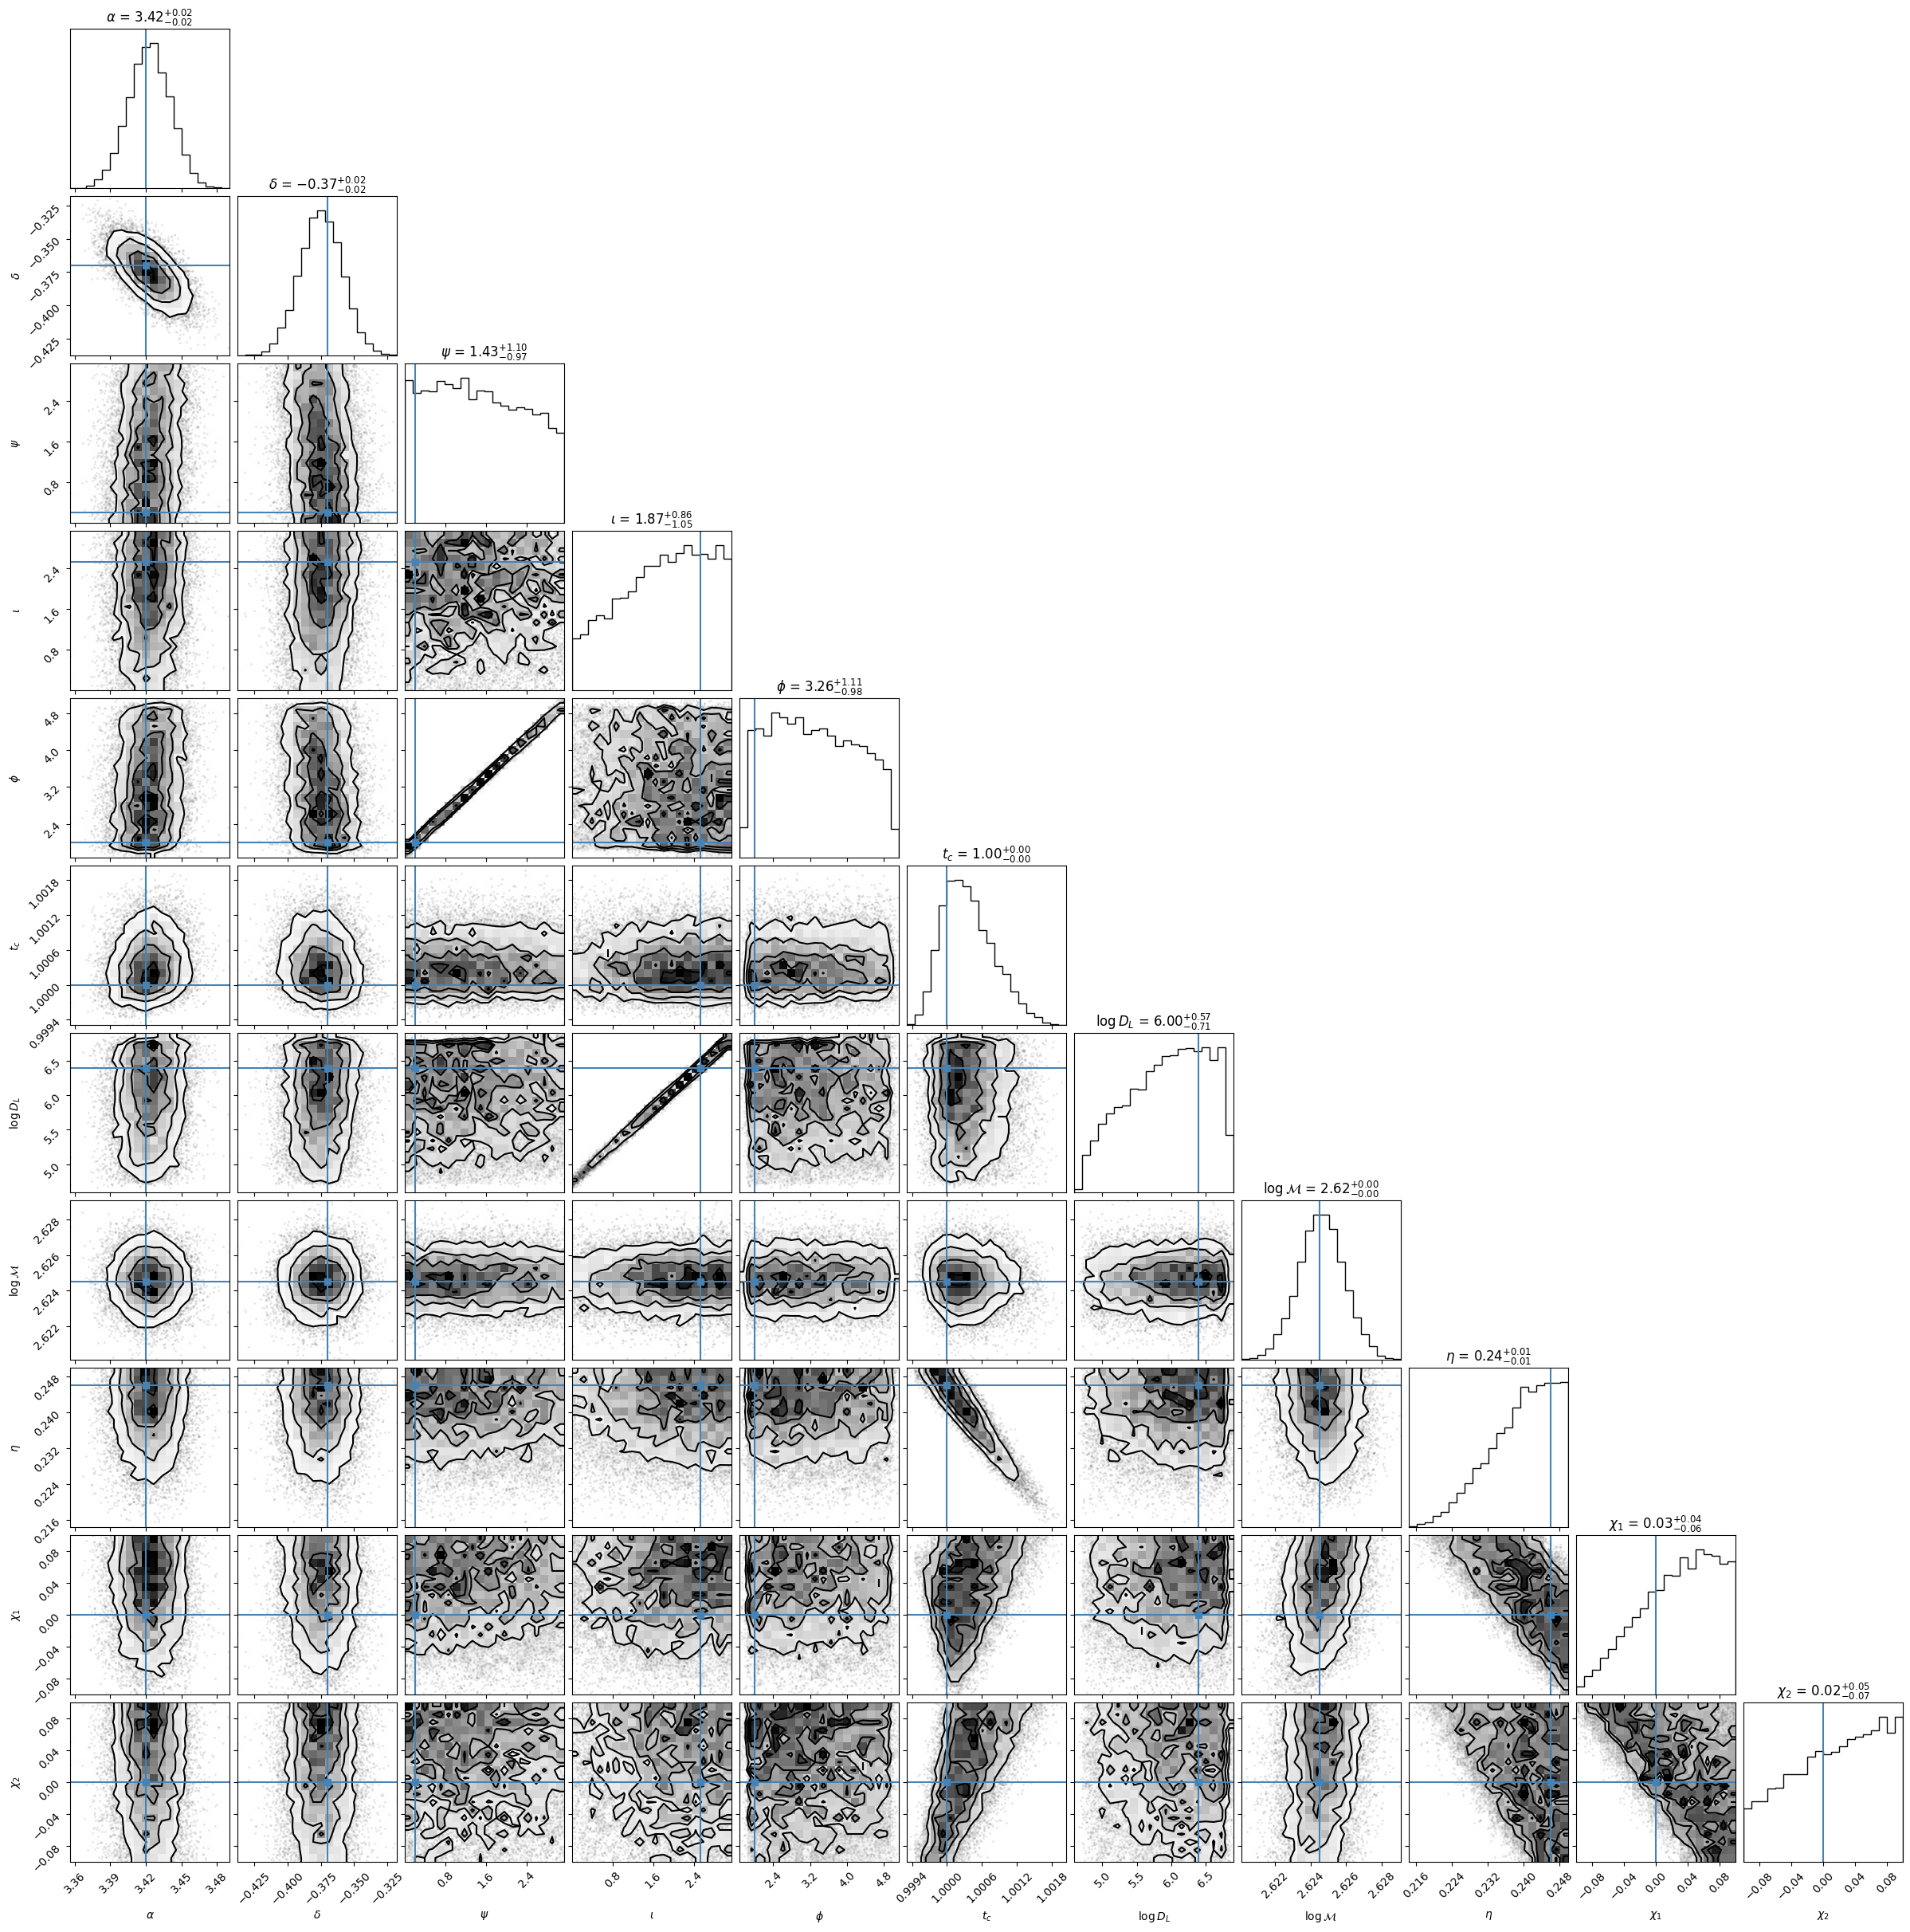

In [20]:

samples = multivariate_normal.rvs(mean=injection,cov=cov, size=10000)
mask = priorRanges(samples)
samples = samples[mask]
while samples.shape[0] < 1e4:
    samples = np.vstack((samples,multivariate_normal.rvs(mean=injection,cov=cov, size=10000)))
    mask = priorRanges(samples)
    samples = samples[mask]
np.savetxt("../data/fisherSamples.csv",samples,delimiter=',')
labels = [r'$\alpha$',r'$\delta$',r'$\psi$',r'$ \iota$',r'$\phi$',r'$t_c$',r'$\log D_L$',r'$\log \mathcal{M}$',r'$\eta$',r'$\chi_1$',r'$\chi_2$']
fig = corner.corner(samples,truths=injection,labels=labels,show_titles=True)
plt.show()
plt.close()